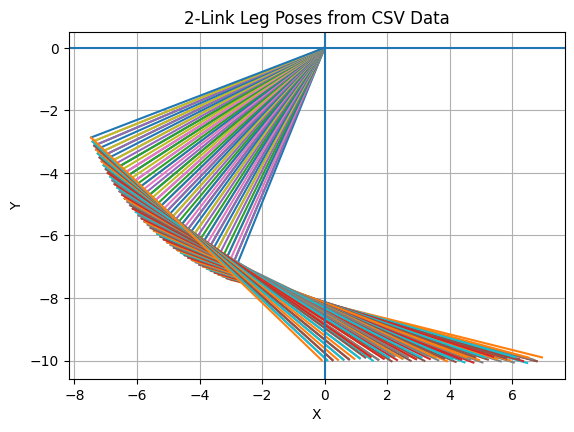

In [35]:
import matplotlib.pyplot as plt
import math
import pandas as pd
from io import StringIO



# Read CSV
df = pd.read_csv("leg_data.csv")

# Link lengths
L1 = 8
L2 = 10.25

plt.figure()

for _, row in df.iterrows():
    hip = math.radians(row["hip_angle"])
    knee = math.radians(row["knee_angle"])

    # Origin
    x0, y0 = 0, 0

    # Hip joint end
    x1 = -L1 * math.cos(hip)   # reflect X over Y-axis
    y1 = -L1 * math.sin(hip)   # optional: flip Y axis if needed

    # Knee joint end
    total_angle = knee+hip
    x2 = x1 - L2 * math.cos(total_angle)  # reflect X for knee
    y2 = y1 - L2 * math.sin(total_angle)  # flip Y axis for knee
    # Draw links
    plt.plot([x0, x1], [y0, y1])
    plt.plot([x1, x2], [y1, y2])

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect("equal", adjustable="box")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("2-Link Leg Poses from CSV Data")
plt.grid(True)

plt.show()


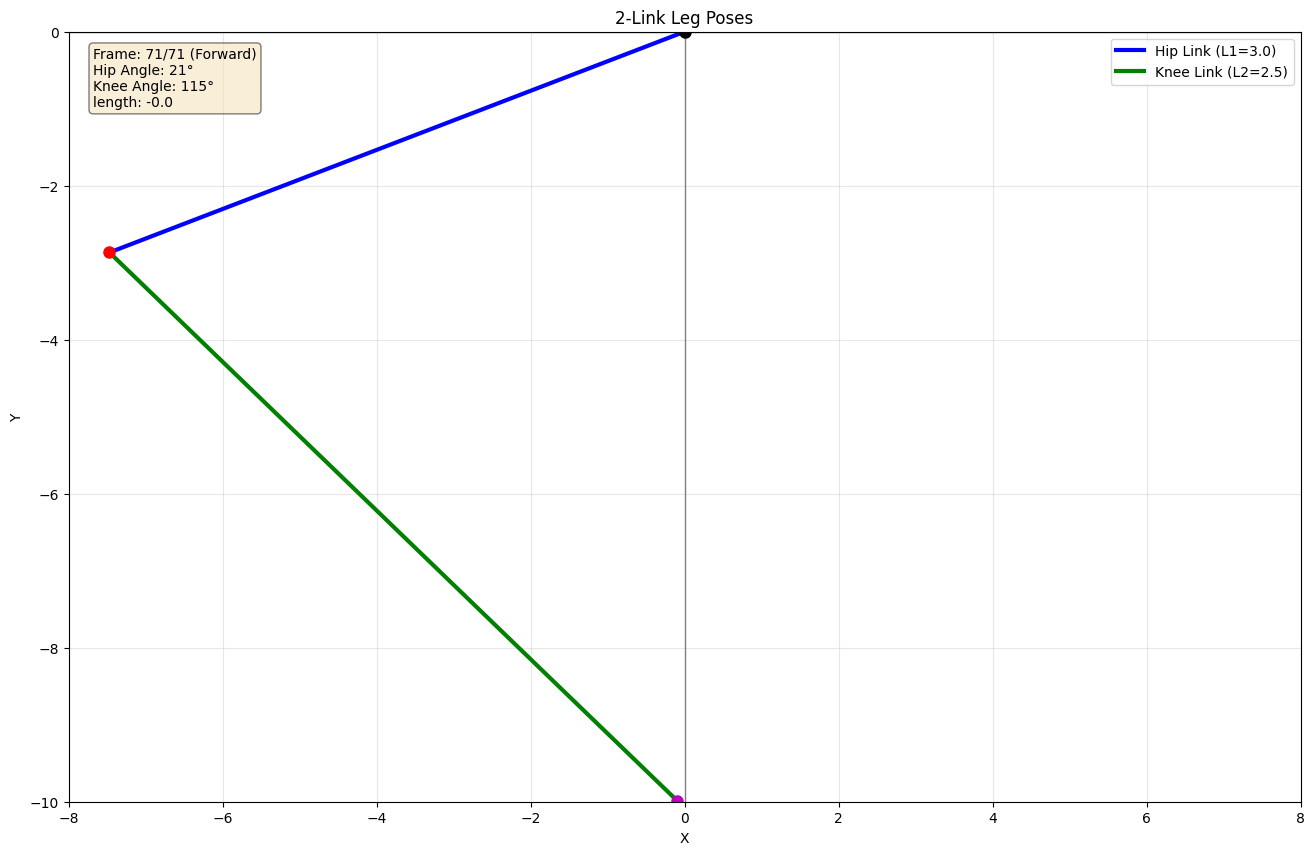

In [36]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import pandas as pd

# Read CSV
df = pd.read_csv("leg_data.csv")

# Link lengths
L1 = 8
L2 = 10.25

# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xlim(-8, 8)
ax.set_ylim(-10, 0)
ax.set_aspect('equal', adjustable='box')
ax.axhline(0, color='gray', linewidth=1)
ax.axvline(0, color='gray', linewidth=1)
ax.grid(True, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2-Link Leg Poses')

# Initialize lines and points
line1, = ax.plot([], [], 'b-', linewidth=3, label='Hip Link (L1=3.0)')
line2, = ax.plot([], [], 'g-', linewidth=3, label='Knee Link (L2=2.5)')
origin, = ax.plot([], [], 'ko', markersize=8)
hip_joint, = ax.plot([], [], 'ro', markersize=8)
foot, = ax.plot([], [], 'mo', markersize=8)

# Text annotations
info_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, 
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.legend(loc='upper right')

# Create bidirectional frame sequence
# Forward: 0 to len(df)-1, Backward: len(df)-2 to 1
forward_frames = list(range(len(df)))
# backward_frames = list(range(len(df)-2, 0, -1))
all_frames = forward_frames

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    origin.set_data([], [])
    hip_joint.set_data([], [])
    foot.set_data([], [])
    info_text.set_text('')
    return line1, line2, origin, hip_joint, foot, info_text

def animate(i):
    # Get actual dataframe index from our bidirectional sequence
    frame = all_frames[i]
    row = df.iloc[frame]
    hip = math.radians(row["hip_angle"])
    knee = math.radians(row["knee_angle"])
    
    # Origin
    x0, y0 = 0, 0
    
    # Hip joint end
    x1 = -L1 * math.cos(hip)
    y1 = -L1 * math.sin(hip)
    
    # Knee joint end (foot)
    x2 = x1 - L2 * math.cos(hip + knee)
    y2 = y1 - L2 * math.sin(hip + knee)
    
    # Update lines
    line1.set_data([x0, x1], [y0, y1])
    line2.set_data([x1, x2], [y1, y2])
    
    # Update points
    origin.set_data([x0], [y0])
    hip_joint.set_data([x1], [y1])
    foot.set_data([x2], [y2])
    
    # Determine direction for display
    direction = "Forward"
    
    # Update info text
    info_text.set_text(f'Frame: {frame+1}/{len(df)} ({direction})\n'
                      f'Hip Angle: {row["hip_angle"]:.0f}°\n'
                      f'Knee Angle: {row["knee_angle"]:.0f}°\n'
                      f'length: {row["length"]:.1f}')
    
    return line1, line2, origin, hip_joint, foot, info_text

# Create animation
# interval is in milliseconds (500ms = 0.5 seconds per frame)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(all_frames), interval=100,
                              blit=True, repeat=True)

# To save the animation (optional):
anim.save('leg_animation1.gif', writer='pillow', fps=15)
# or as mp4:
# anim.save('leg_animation1.mp4', writer='ffmpeg', fps=10)

plt.show()

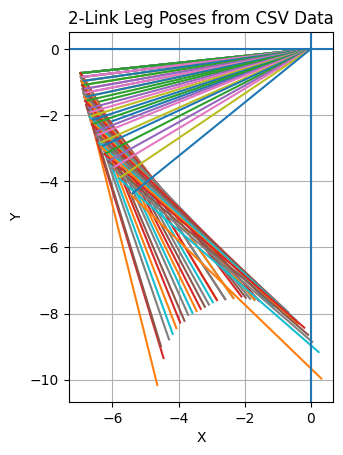

In [6]:
import matplotlib.pyplot as plt
import math
import pandas as pd
from io import StringIO



# Read CSV
df = pd.read_csv("angle_arc.csv")

# Link lengths
L1 = 7
L2 = 8

plt.figure()

for _, row in df.iterrows():
    hip = math.radians(row["hip_angle"])
    knee = math.radians(row["knee_angle"])

    # Origin
    x0, y0 = 0, 0

    # Hip joint end
    x1 = -L1 * math.cos(hip)   # reflect X over Y-axis
    y1 = -L1 * math.sin(hip)   # optional: flip Y axis if needed

    # Knee joint end
    total_angle = hip + knee
    x2 = x1 - L2 * math.cos(total_angle)  # reflect X for knee
    y2 = y1 - L2 * math.sin(total_angle)  # flip Y axis for knee
    # Draw links
    plt.plot([x0, x1], [y0, y1])
    plt.plot([x1, x2], [y1, y2])

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect("equal", adjustable="box")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("2-Link Leg Poses from CSV Data")
plt.grid(True)

plt.show()


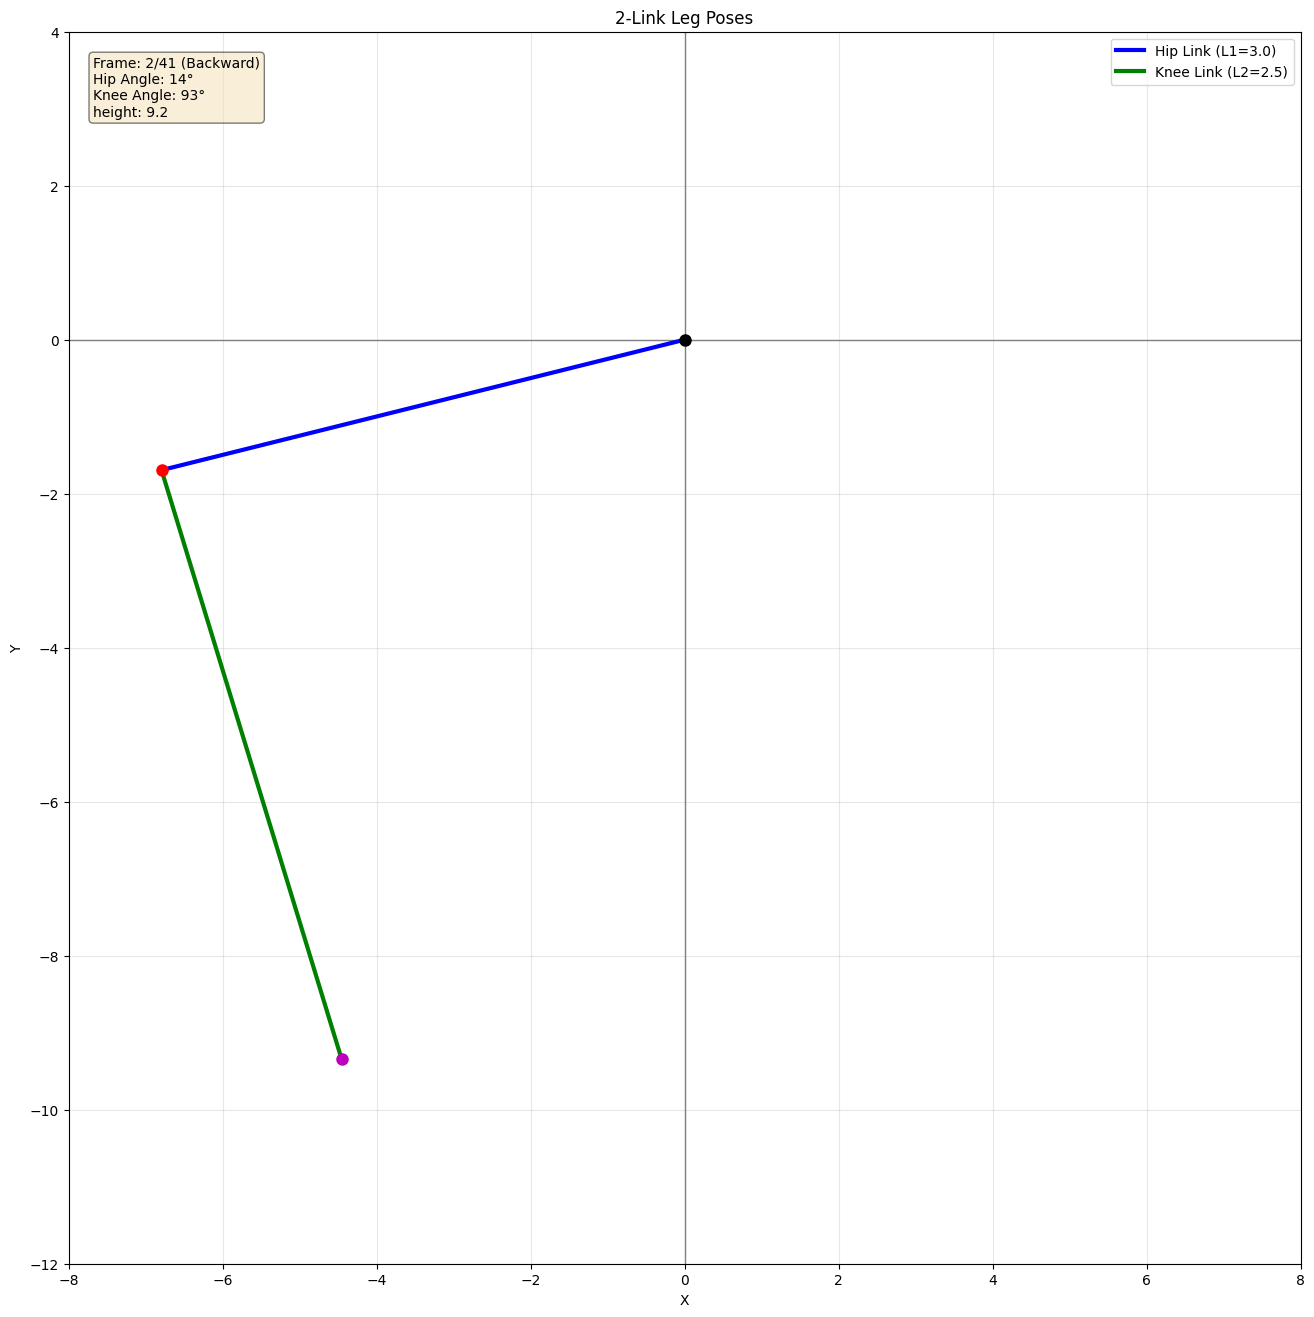

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import pandas as pd

# Read CSV
df = pd.read_csv("angle_arc.csv")

# Link lengths
L1 = 7
L2 = 8

# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_xlim(-8, 8)
ax.set_ylim(-12, 4)
ax.set_aspect('equal', adjustable='box')
ax.axhline(0, color='gray', linewidth=1)
ax.axvline(0, color='gray', linewidth=1)
ax.grid(True, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2-Link Leg Poses')

# Initialize lines and points
line1, = ax.plot([], [], 'b-', linewidth=3, label='Hip Link (L1=3.0)')
line2, = ax.plot([], [], 'g-', linewidth=3, label='Knee Link (L2=2.5)')
origin, = ax.plot([], [], 'ko', markersize=8)
hip_joint, = ax.plot([], [], 'ro', markersize=8)
foot, = ax.plot([], [], 'mo', markersize=8)

# Text annotations
info_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, 
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.legend(loc='upper right')

# Create bidirectional frame sequence
# Forward: 0 to len(df)-1, Backward: len(df)-2 to 1
forward_frames = list(range(len(df)))
backward_frames = list(range(len(df)-2, 0, -1))
all_frames = forward_frames + backward_frames

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    origin.set_data([], [])
    hip_joint.set_data([], [])
    foot.set_data([], [])
    info_text.set_text('')
    return line1, line2, origin, hip_joint, foot, info_text

def animate(i):
    # Get actual dataframe index from our bidirectional sequence
    frame = all_frames[i]
    row = df.iloc[frame]
    hip = math.radians(row["hip_angle"])
    knee = math.radians(row["knee_angle"])
    
    # Origin
    x0, y0 = 0, 0
    
    # Hip joint end
    x1 = -L1 * math.cos(hip)
    y1 = -L1 * math.sin(hip)
    
    # Knee joint end (foot)
    x2 = x1 - L2 * math.cos(hip + knee)
    y2 = y1 - L2 * math.sin(hip + knee)
    
    # Update lines
    line1.set_data([x0, x1], [y0, y1])
    line2.set_data([x1, x2], [y1, y2])
    
    # Update points
    origin.set_data([x0], [y0])
    hip_joint.set_data([x1], [y1])
    foot.set_data([x2], [y2])
    
    # Determine direction for display
    direction = "Forward" if i < len(df) else "Backward"
    
    # Update info text
    info_text.set_text(f'Frame: {frame+1}/{len(df)} ({direction})\n'
                      f'Hip Angle: {row["hip_angle"]:.0f}°\n'
                      f'Knee Angle: {row["knee_angle"]:.0f}°\n'
                      f'height: {row["height_from_ground"]:.1f}')
    
    return line1, line2, origin, hip_joint, foot, info_text

# Create animation
# interval is in milliseconds (500ms = 0.5 seconds per frame)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(all_frames), interval=100,
                              blit=True, repeat=True)

# To save the animation (optional):
anim.save('leg_animation.gif', writer='pillow', fps=15)
# or as mp4:
anim.save('leg_animation.mp4', writer='ffmpeg', fps=10)

plt.show()